# Select and Load IRIS Dataset #

In [51]:
import tkinter as tk
import pandas as pd
import numpy as np

from tkinter import filedialog
from datetime import datetime
def get_path():
    root = tk.Tk()
    dirname = filedialog.askopenfilename(parent=root,initialdir="/",title='Please select a directory')
    root.withdraw()
    return dirname
def load_dataset():
    dir_name = get_path()
    dataset = pd.read_csv(dir_name)
    return dataset
iris = load_dataset()

# Encode Categories inorder to move ahead with one hot encoding #

In [52]:
def encode_category(x):
    if x == "setosa":
        return 0;
    elif x == "versicolor":
        return 1
    elif x == "virginica":
        return 2
iris["species_category"] = iris["species"].apply(encode_category)
del iris["species"]   #We have assign flag values to our categorical data. No need for original column

# Perform one hot encoding #

In [53]:
iris['Setosa'] = 0
iris['Versicolor'] = 0
iris['Virginica'] = 0
labels = iris["species_category"] == 0
iris.loc[labels,'Setosa'] = 1
labels_v = iris["species_category"] == 1
iris.loc[labels_v,'Versicolor'] = 1
labels_vir = iris['species_category'] == 2
iris.loc[labels_vir,'Virginica'] = 1

# Normalize Data #

In [54]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["species_category"]=dataset["species_category"]
    return dataNorm
iris = normalize(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_category,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,0,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,0,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,0,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,0,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0.0,0.0,1.0
146,0.555556,0.208333,0.677966,0.750000,2,0.0,0.0,1.0
147,0.611111,0.416667,0.711864,0.791667,2,0.0,0.0,1.0
148,0.527778,0.583333,0.745763,0.916667,2,0.0,0.0,1.0


# Split in train and test #

In [55]:
iris = iris.sample(frac=1).reset_index(drop=True)
train_data = iris.iloc[:112]
test_data = iris.iloc[112:]
train_features = train_data.loc[:,train_data.columns!='species_category']
train_target = train_data[['species_category']]
test_features = test_data.loc[:,train_data.columns!='species_category']
test_target = test_data[['species_category']]
train_features

,sepal_length,sepal_width,petal_length,petal_width,Setosa,Versicolor,Virginica
0,0.694444,0.416667,0.762712,0.833333,0.0,0.0,1.0
1,0.277778,0.708333,0.084746,0.041667,1.0,0.0,0.0
2,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0
3,0.444444,0.500000,0.644068,0.708333,0.0,1.0,0.0
4,0.666667,0.208333,0.813559,0.708333,0.0,0.0,1.0
...,...,...,...,...,...,...,...
107,0.388889,0.333333,0.525424,0.500000,0.0,1.0,0.0
108,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0
109,0.138889,0.583333,0.101695,0.041667,1.0,0.0,0.0
110,0.083333,0.500000,0.067797,0.041667,1.0,0.0,0.0


# Different activation function with derivatives #

In [56]:
def tanh(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return np.tanh(x)
    #return t
def tanh_prime(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return (1-tanh(x)*tanh(x))
    #return 1-t**2
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def relu(x):
    x[x<0] = 0
    return x
def relu_prime(x):
    x[x>0]=1
    x[x<=1]=0
    return x
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generate Random Weights #

In [57]:
def generate_randomWeights():
    w1 = np.random.randn(4,6)
    w2 = np.random.randn(6,3)
    return w1,w2

# Feed Forward Function with Sigmoid, Tanh and Relu as hidden layer activation function #

In [58]:
def feed_forward_sigmoid(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = sigmoid(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_tanh(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = tanh(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_relu(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = relu(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o

# Back Propagation function for Sigmoid Tanh and Relu activation function #

In [59]:
def back_propagate_sigmoid(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_tanh(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_relu(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = relu_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo

# Decode test data species category to actual target variables which would be later used for accuracy checking #

In [60]:
def decode_category(x):
    if x == 0:
        return "Setosa";
    elif x == 1:
        return "Versicolor"
    elif x == 2:
        return "Virginica"
test_data["species_category"] = test_data["species_category"].apply(decode_category)

/Users/malavshastri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Training for sigmoid activation function #

In [61]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_sigmoid,w2_sigmoid = generate_randomWeights()
error_cost_sigmoid = []
learning_rate_sigmoid = 0.01
for i in range(0,5000):
    z2_sigmoid,a2_sigmoid,z3_sigmoid,o_sigmoid = feed_forward_sigmoid(train_features[features_after_addition],w1_sigmoid,w2_sigmoid)
    djdw1_sigmoid, djdw2_sigmoid = back_propagate_sigmoid(train_features, o_sigmoid ,z2_sigmoid, z3_sigmoid, a2_sigmoid, w2_sigmoid)
    loss_sigmoid = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_sigmoid)).sum(axis=1)/len(train_features))
    error_cost_sigmoid.append(loss_sigmoid)
    w1_sigmoid = w1_sigmoid-learning_rate_sigmoid*djdw1_sigmoid
    w2_sigmoid = w2_sigmoid-learning_rate_sigmoid*djdw2_sigmoid
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_sigmoid))

             0
0     2.604915
1     1.426217
2     1.186490
3     1.141407
4     1.117609
...        ...
4995  0.050236
4996  0.050232
4997  0.050228
4998  0.050225
4999  0.050221

[5000 rows x 1 columns]


# Run the sigmoid model on test data #

In [62]:
z2_sigmoid,a2_sigmoid,z3_sigmoid,o_test_sigmoid = feed_forward_sigmoid(test_features[features_after_addition],w1_sigmoid,w2_sigmoid)
o_test_sigmoid['Maximum'] = o_test_sigmoid[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_sigmoid['Actual_Output'] = test_data['species_category']
o_test_sigmoid

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
112,7.907173e-08,0.016728,9.832719e-01,Virginica,Virginica
113,1.309067e-03,0.975024,2.366710e-02,Versicolor,Versicolor
114,5.638855e-04,0.967992,3.144397e-02,Versicolor,Versicolor
115,9.730564e-01,0.026944,3.107891e-15,Setosa,Setosa
116,5.243905e-05,0.601517,3.984310e-01,Versicolor,Virginica
117,2.527795e-04,0.334109,6.656386e-01,Virginica,Virginica
118,9.996759e-01,0.000324,1.334307e-16,Setosa,Setosa
119,2.034777e-05,0.217439,7.825408e-01,Virginica,Virginica
120,7.096874e-06,0.025276,9.747173e-01,Virginica,Virginica
121,9.931793e-01,0.006821,2.421263e-16,Setosa,Setosa


# Print iteration vs training cost graph and test data prediction accuracy #

Test Data Accuracy For Sigmoid:  92.10526315789474 %
F1 Score is  92.29461515576523 %
[[11  0  0]
 [ 1 14  2]
 [ 0  0 10]]


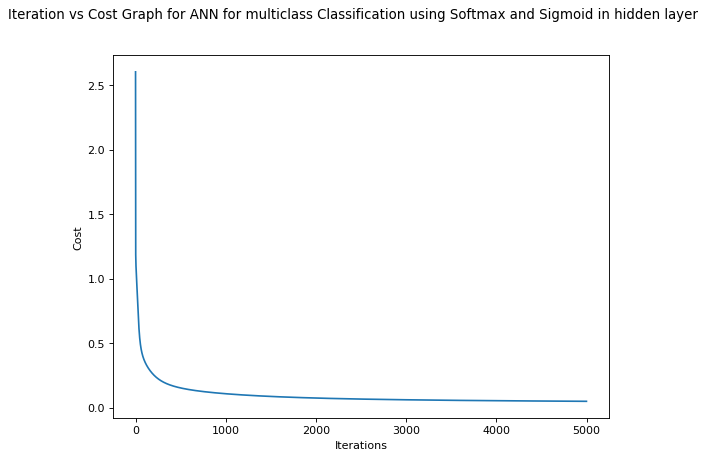

In [63]:
itr = np.arange(0,len(error_cost_sigmoid))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Sigmoid in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_sigmoid)
from sklearn.metrics import accuracy_score
score_sigmoid = accuracy_score(o_test_sigmoid['Maximum'],o_test_sigmoid['Actual_Output'])*100
print("Test Data Accuracy For Sigmoid: ", score_sigmoid, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'])
print(confusion)

## Printing the confusion matrix ##

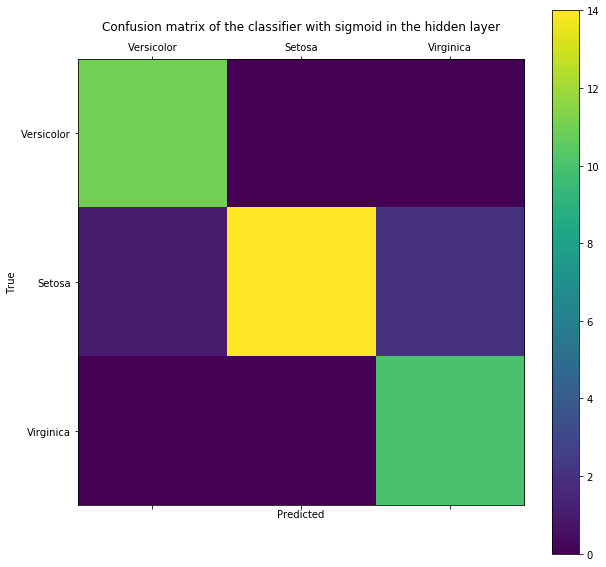

In [64]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with sigmoid in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training for Tanh activation function #

In [65]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_tanh,w2_tanh = generate_randomWeights()
error_cost_tanh = []
learning_rate_tanh = 0.01
for i in range(0,5000):
    z2_tanh,a2_tanh,z3_tanh,o_tanh = feed_forward_tanh(train_features[features_after_addition],w1_tanh,w2_tanh)
    djdw1_tanh, djdw2_tanh = back_propagate_tanh(train_features, o_tanh ,z2_tanh, z3_tanh, a2_tanh, w2_tanh)
    loss_tanh = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_tanh)).sum(axis=1)/len(train_features))
    error_cost_tanh.append(loss_tanh)
    w1_tanh = w1_tanh-learning_rate_tanh*djdw1_tanh
    w2_tanh = w2_tanh-learning_rate_tanh*djdw2_tanh
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_tanh))

             0
0     2.400836
1     0.788136
2     0.633482
3     0.588616
4     0.562095
...        ...
4995  0.060804
4996  0.060646
4997  0.060492
4998  0.060343
4999  0.060197

[5000 rows x 1 columns]


# Run the Tanh model on test data #

In [66]:
z2_tanh,a2_tanh,z3_tanh,o_test_tanh = feed_forward_tanh(test_features[features_after_addition],w1_tanh,w2_tanh)
o_test_tanh['Maximum'] = o_test_tanh[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_tanh['Actual_Output'] = test_data['species_category']
o_test_tanh

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
112,5.598673e-07,4.343590e-02,9.565635e-01,Virginica,Virginica
113,1.054108e-04,9.574991e-01,4.239548e-02,Versicolor,Versicolor
114,1.633646e-05,9.463637e-01,5.362000e-02,Versicolor,Versicolor
115,9.993346e-01,6.653842e-04,1.510855e-08,Setosa,Setosa
116,1.376741e-05,5.466147e-01,4.533715e-01,Versicolor,Virginica
117,1.614379e-05,1.903038e-01,8.096801e-01,Virginica,Virginica
118,9.999892e-01,2.133279e-08,1.073918e-05,Setosa,Setosa
119,3.514124e-06,1.217871e-01,8.782094e-01,Virginica,Virginica
120,1.999580e-06,2.132705e-02,9.786710e-01,Virginica,Virginica
121,9.999978e-01,1.786089e-06,3.937280e-07,Setosa,Setosa


# Print iteration vs training cost graph and test data prediction accuracy for Tanh Activation Function #

Test Data Accuracy For Tanh:  89.47368421052632 %
F1 Score is  89.62215320910974 %
[[11  0  0]
 [ 1 14  3]
 [ 0  0  9]]


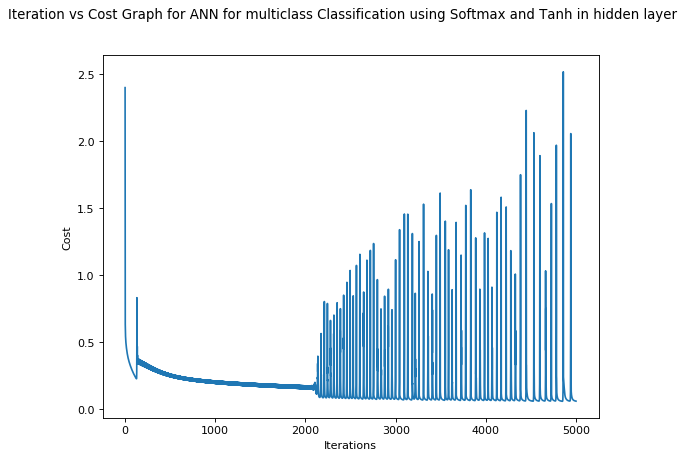

In [67]:
itr = np.arange(0,len(error_cost_tanh))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Tanh in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_tanh)
from sklearn.metrics import accuracy_score
score_tanh = accuracy_score(o_test_tanh['Maximum'],o_test_tanh['Actual_Output'])*100
print("Test Data Accuracy For Tanh: ", score_tanh, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'])
print(confusion)


# Plotting the confusion matrix for tanh in hidden layer#

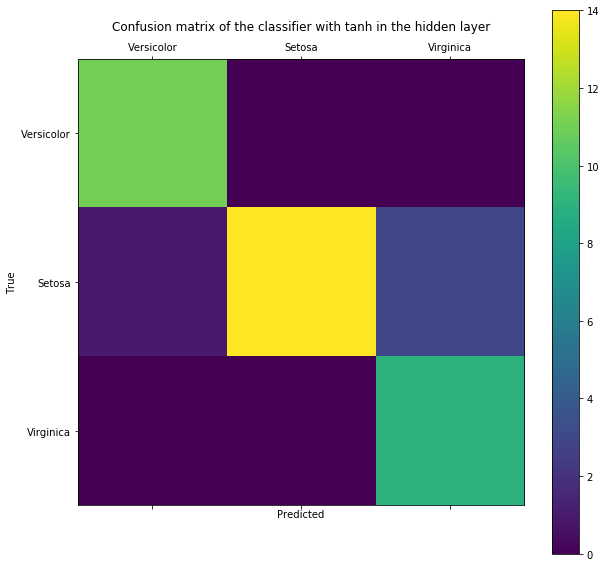

In [68]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with tanh in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training for Relu activation function #

In [ ]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_relu,w2_relu = generate_randomWeights()
error_cost_relu = []
learning_rate_relu = 0.01
for i in range(0,5000):
    z2_relu,a2_relu,z3_relu,o_relu = feed_forward_relu(train_features[features_after_addition],w1_relu,w2_relu)
    djdw1_relu, djdw2_relu = back_propagate_relu(train_features, o_relu ,z2_relu, z3_relu, a2_relu, w2_relu)
    loss_relu = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_relu)).sum(axis=1)/len(train_features))
    error_cost_relu.append(loss_relu)
    w1_relu = w1_relu-learning_rate_relu*djdw1_relu
    w2_relu = w2_relu-learning_rate_relu*djdw2_relu
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_relu))

# Run the Relu model on test data #

In [ ]:
z2_relu,a2_relu,z3_relu,o_test_relu = feed_forward_relu(test_features[features_after_addition],w1_relu,w2_relu)
o_test_relu['Maximum'] = o_test_relu[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_relu['Actual_Output'] = test_data['species_category']
o_test_relu

# Print iteration vs training cost graph and test data prediction accuracy for Relu Activation Function #

In [ ]:
itr = np.arange(0,len(error_cost_relu))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Relu in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_relu)
from sklearn.metrics import accuracy_score
score_relu = accuracy_score(o_test_relu['Maximum'],o_test_relu['Actual_Output'])*100
print("Test Data Accuracy For Relu: ", score_relu, "%")
o_test_relu
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_relu['Maximum'], o_test_relu['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_relu['Maximum'], o_test_relu['Actual_Output'])
print(confusion)


In [ ]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with sigmoid in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()